In [ ]:
#importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###**Exploratory Data Analysis**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Housingtrain.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# shape
data.shape

(1460, 81)

In [ ]:
# names of columns
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
#total number of columns
len(data.columns)

81

In [ ]:
# dtypes, non null values in each attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# to check how each attribute varies
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# count of numerical and categorical features
num_ = data.select_dtypes(['int64', 'float64']).columns
cat_ = data.select_dtypes('object').columns
len(num_), len(cat_)

(38, 43)

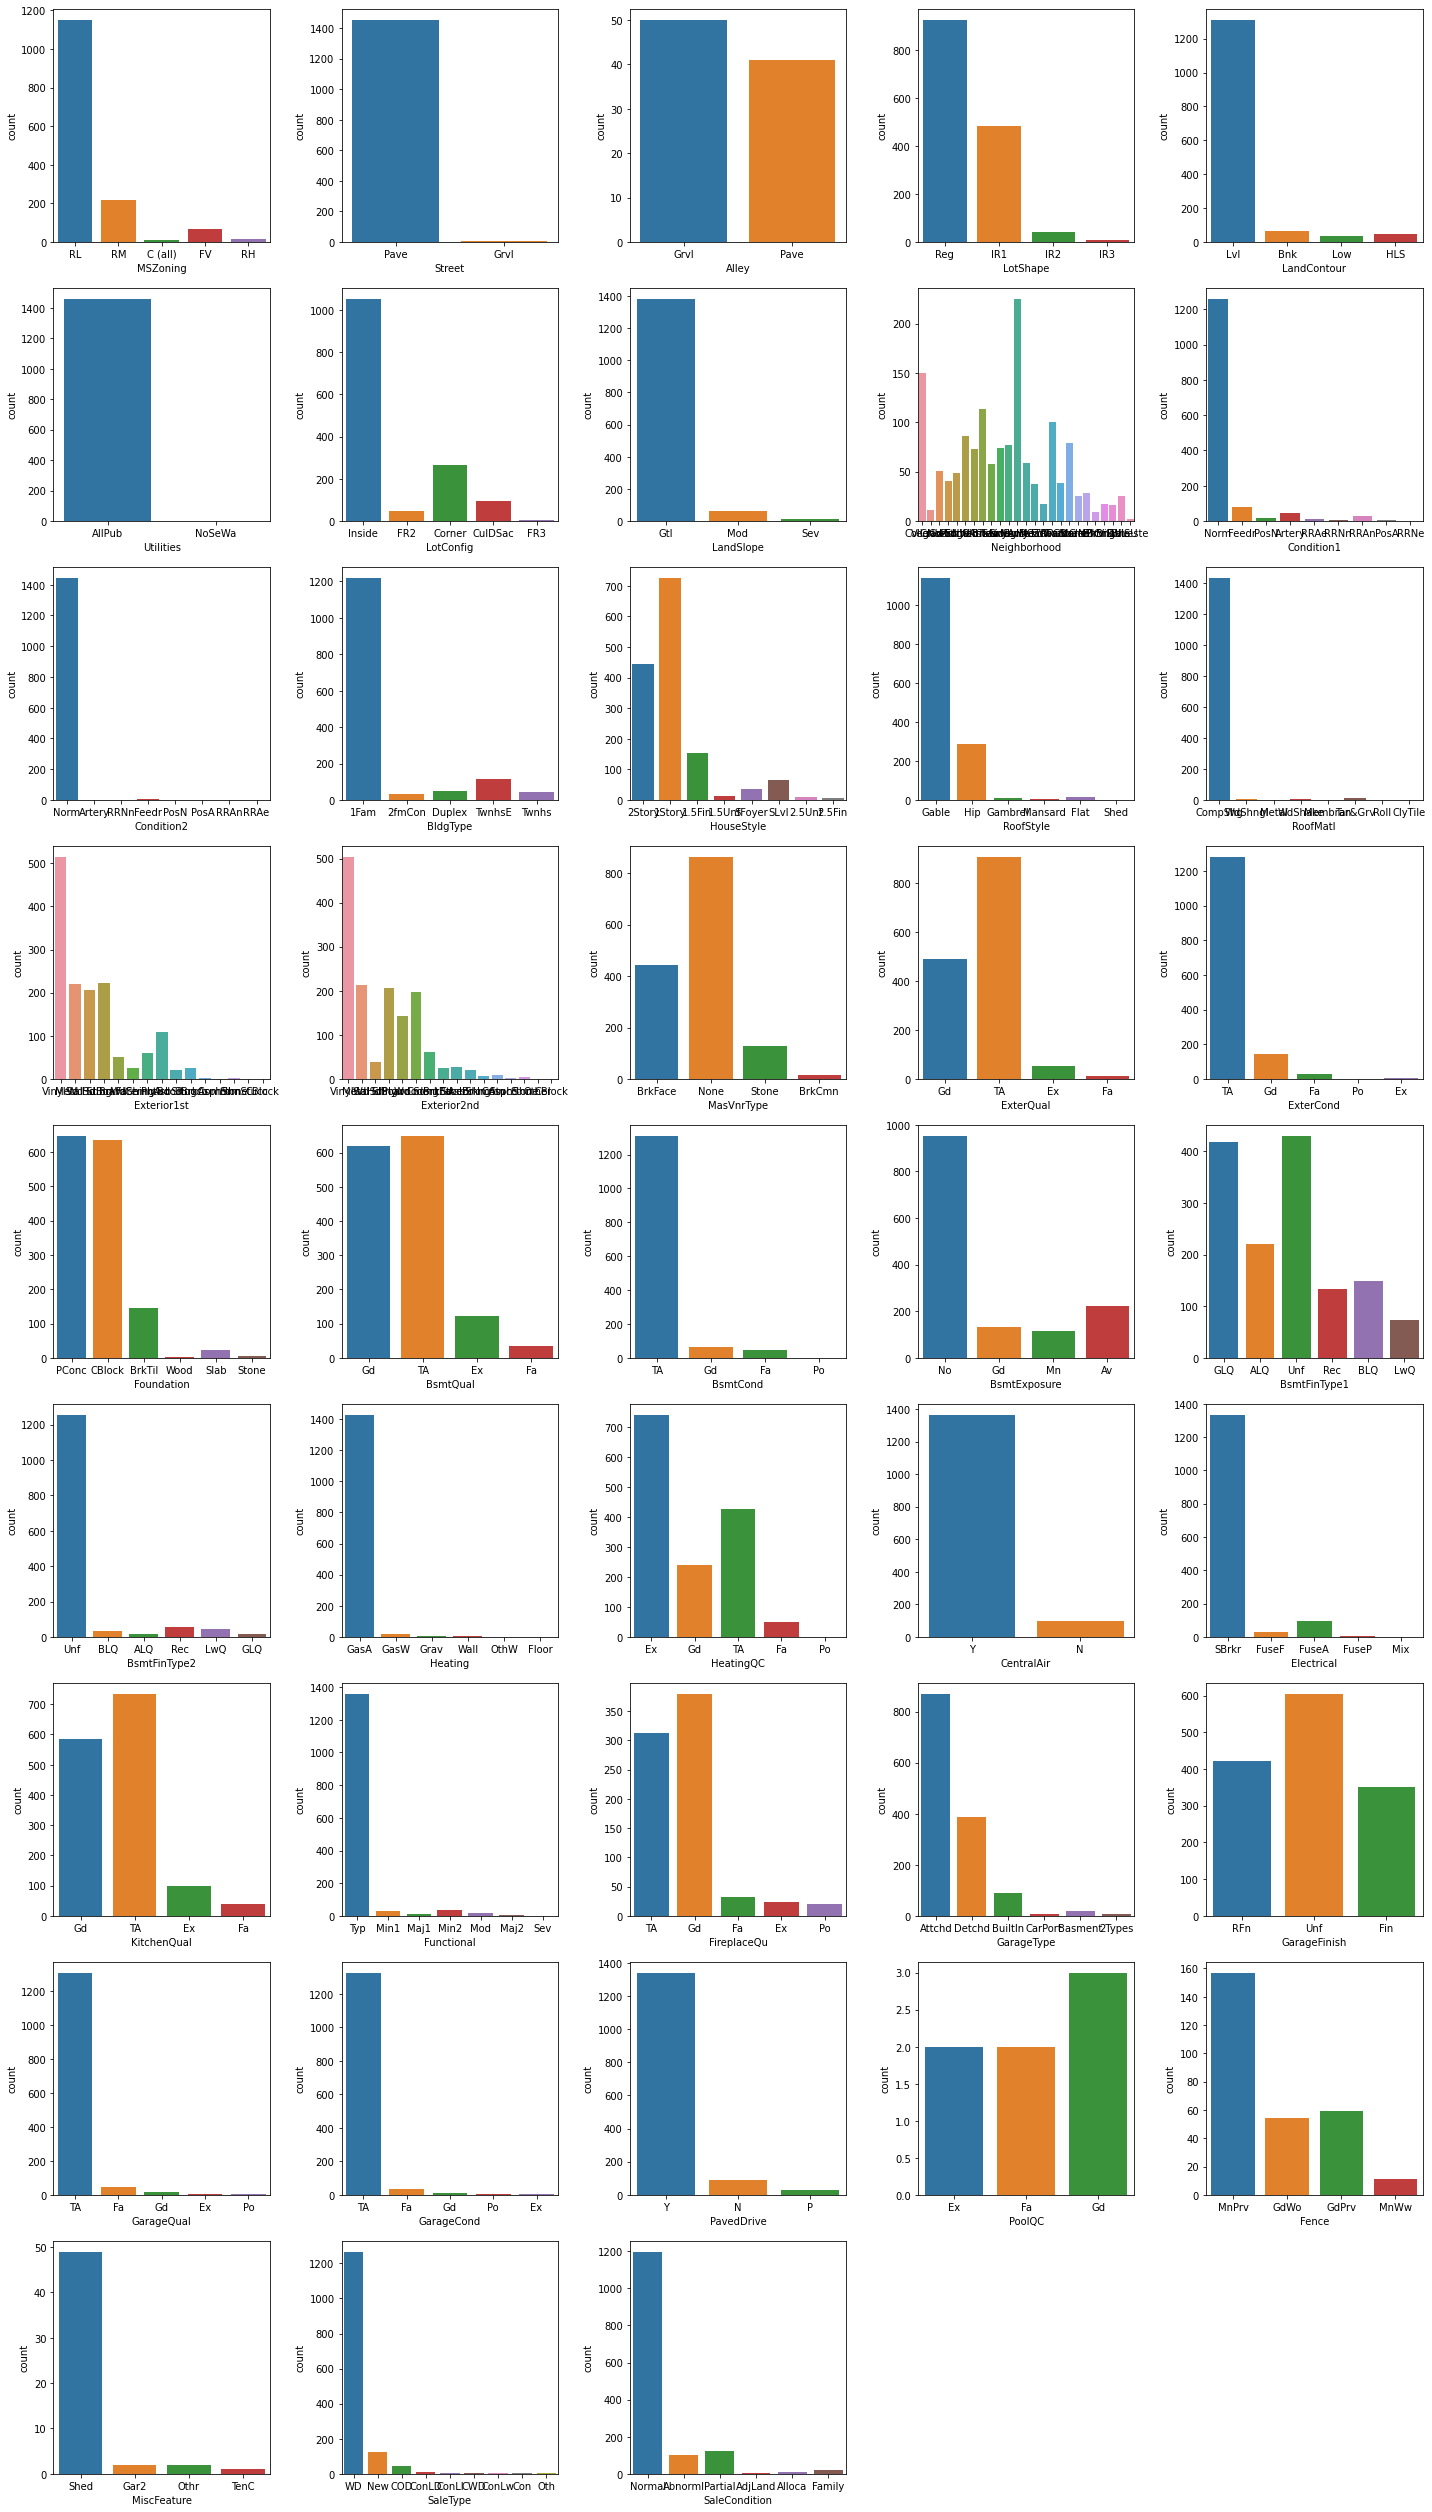

In [ ]:
# countplot for categorical variables
# we can see distribution of various classes in different attributes
plt.figure(figsize = (20,35))
for j,i in enumerate(cat_):
  plt.subplot(9,5,j+1)
  sns.countplot(data = data, x = i)
  plt.tight_layout()

In [ ]:
# to check % of different classes in various attributes
x = []
for i in cat_:
  f = []
  d = data[i].value_counts()
  for t in d:
    f.append(t/data.shape[0]*100)
  x.append((i,f))
g = pd.DataFrame(x)
g

,0,1
0,MSZoning,"[78.83561643835615, 14.931506849315069, 4.4520..."
1,Street,"[99.58904109589041, 0.410958904109589]"
2,Alley,"[3.4246575342465753, 2.808219178082192]"
3,LotShape,"[63.35616438356164, 33.15068493150685, 2.80821..."
4,LandContour,"[89.7945205479452, 4.315068493150685, 3.424657..."
5,Utilities,"[99.93150684931507, 0.0684931506849315]"
6,LotConfig,"[72.05479452054794, 18.013698630136986, 6.4383..."
7,LandSlope,"[94.65753424657535, 4.4520547945205475, 0.8904..."
8,Neighborhood,"[15.41095890410959, 10.273972602739725, 7.7397..."
9,Condition1,"[86.3013698630137, 5.5479452054794525, 3.28767..."


From the above analysis we can see that some attributes have major proportion of one class. So they might not help us in modelling, so we will remove them. They are: Street, LandContour, Utilities, Landslope, Condition2, RoofMatl, BsmtCond, Central Air, Electrical, Functional, GarageQual, GarageCond, PavedDrive.

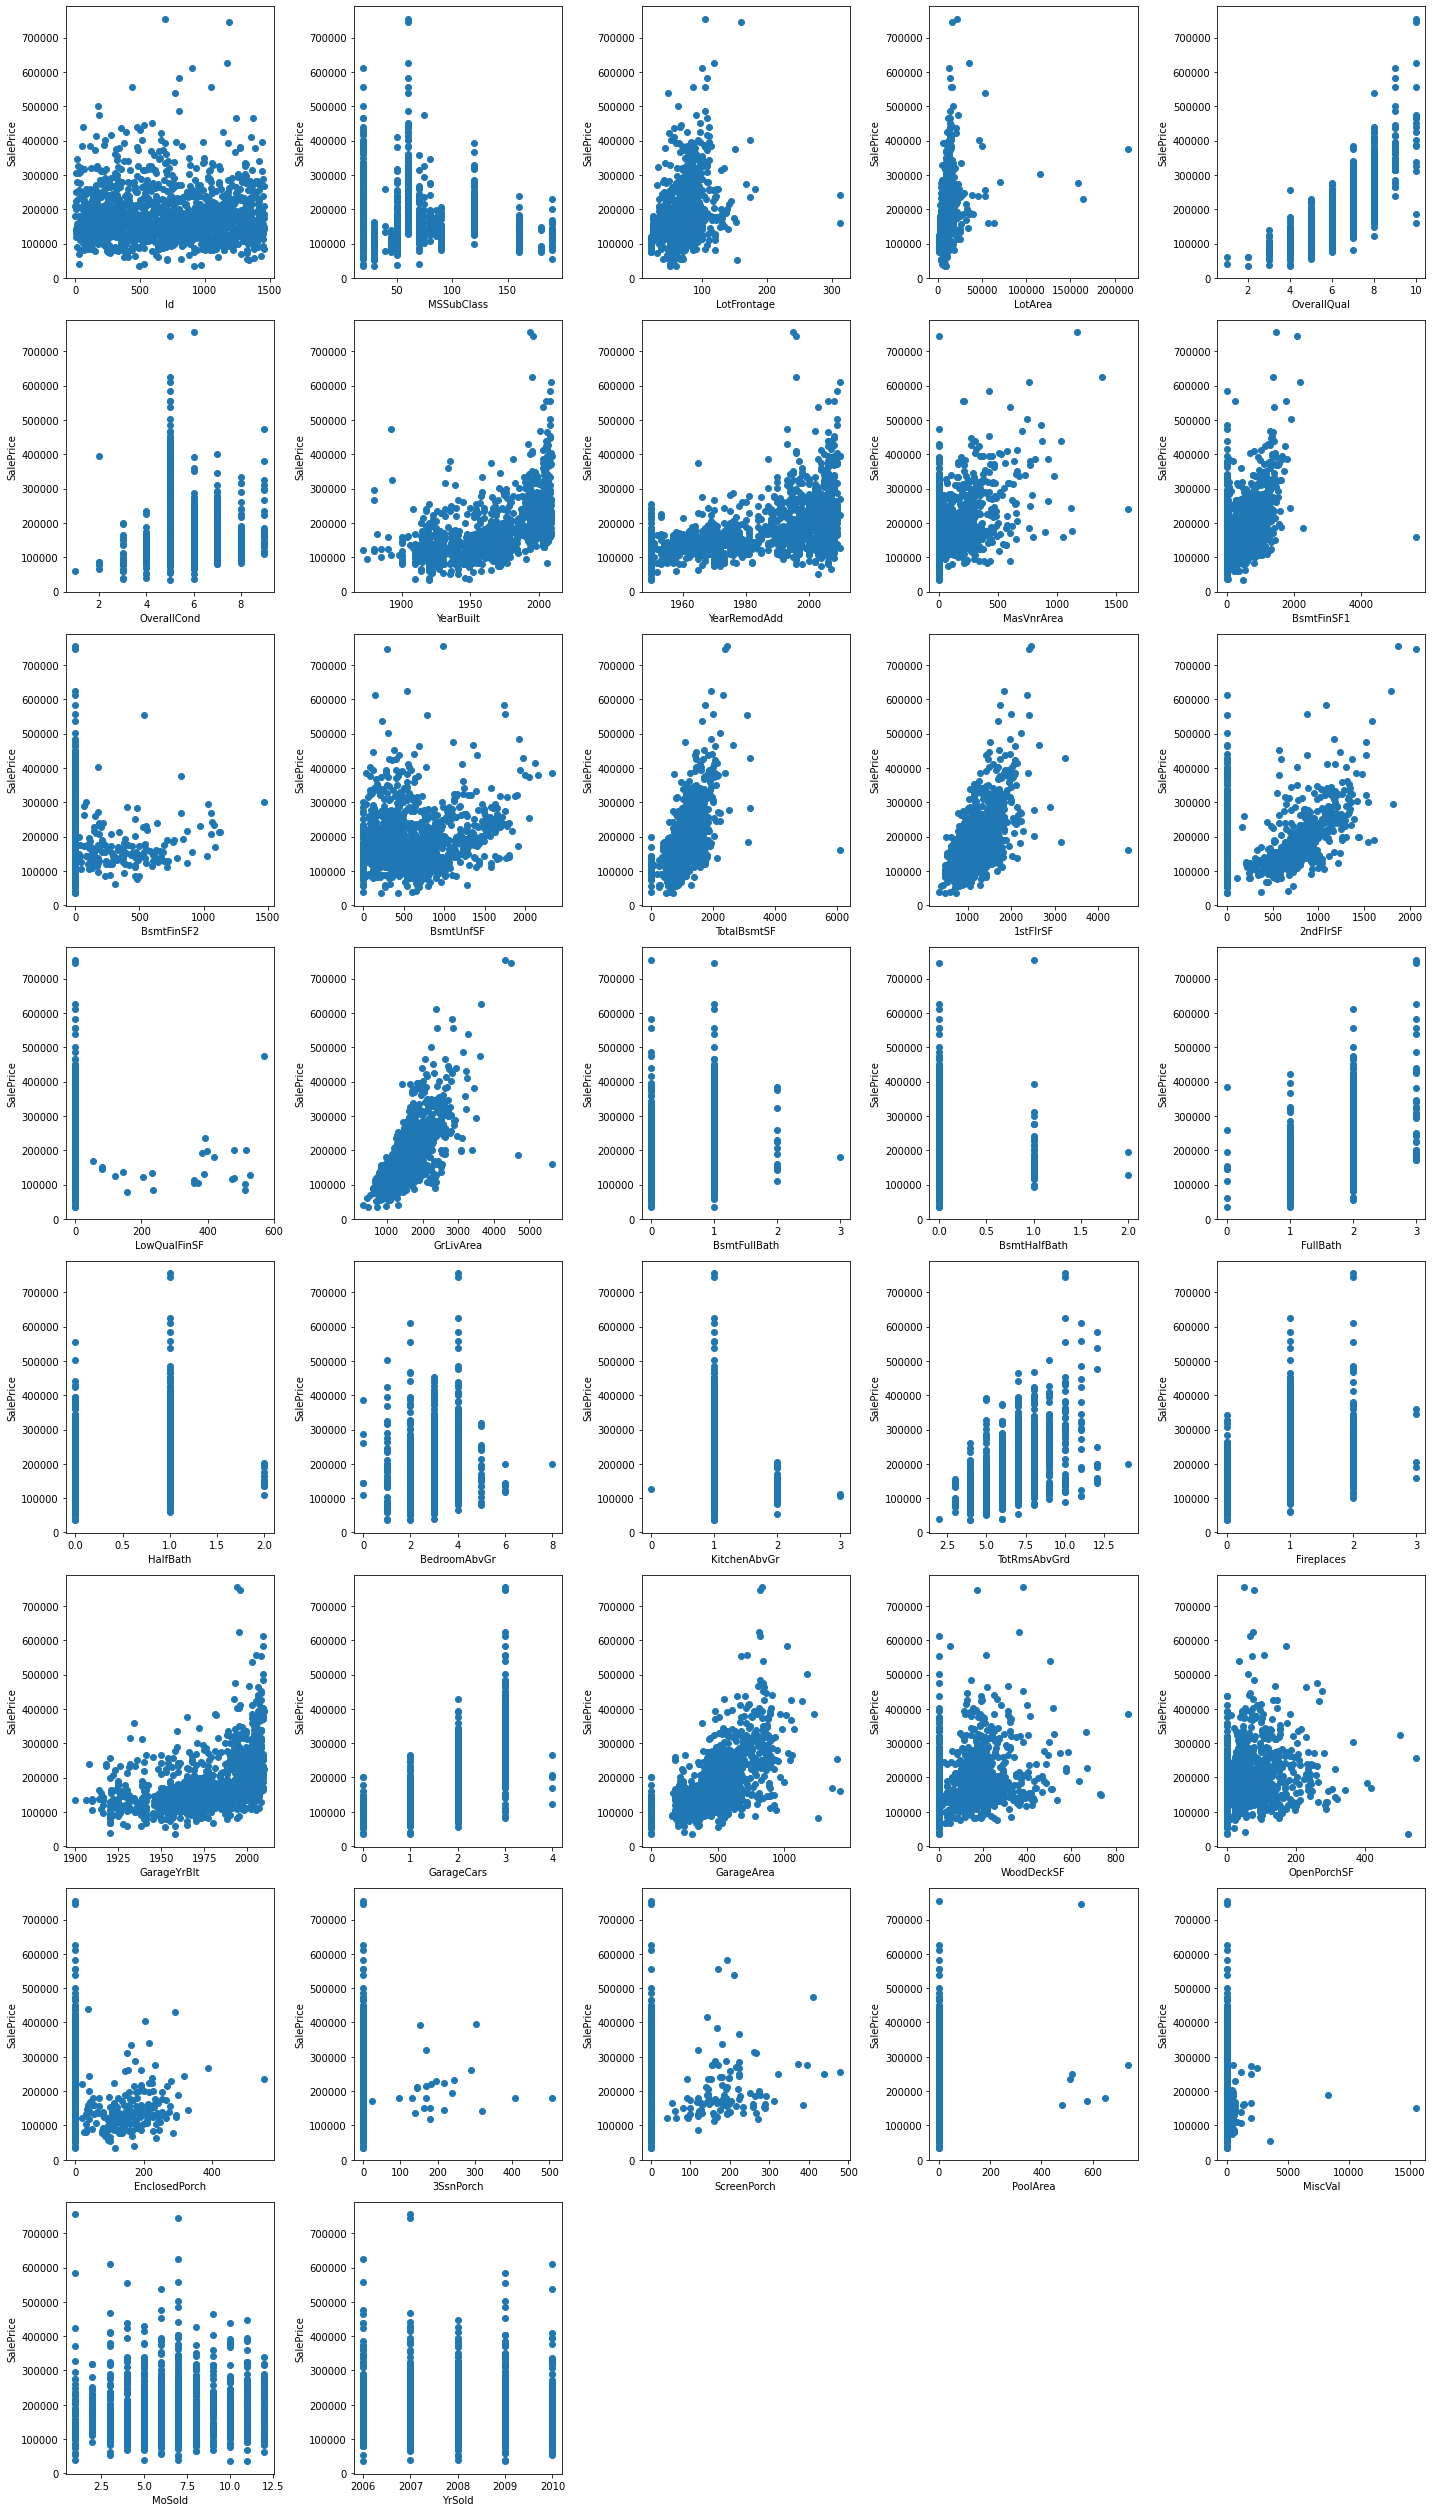

In [ ]:
# scatterplot for numerical variables
# we can see which variables have a positive relationship with SalePrice
plt.figure(figsize = (20,35))
for j,i in enumerate(num_[:-1]):
  plt.subplot(8,5,j+1)
  plt.scatter(x = data[i], y = data['SalePrice'])
  plt.xlabel(i)
  plt.ylabel('SalePrice')
  plt.tight_layout()


**Looking over the distribution, some of the features should be converted to categorical form. They are: LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, KitchenAbvGr, Fireplaces, GarageCars, PoolArea, YrSold.**

###**Data Preprocessing**

In [ ]:
# Dropping irrelevant features
data = data.drop('Id', axis = 1)

In [ ]:
# Checking out the null values
missing = []
for i in data.columns:
  if (data[i].isnull()).any():
    t = data[i].isnull().sum()
    missing.append((i,t,t/data.shape[0]*100, data[i].dtypes))
d = pd.DataFrame(missing, columns = ['Column', 'Count(null)', 'Percent','Datatype'])
d

,Column,Count(null),Percent,Datatype
0,LotFrontage,259,17.739726,float64
1,Alley,1369,93.767123,object
2,MasVnrType,8,0.547945,object
3,MasVnrArea,8,0.547945,float64
4,BsmtQual,37,2.534247,object
5,BsmtCond,37,2.534247,object
6,BsmtExposure,38,2.602740,object
7,BsmtFinType1,37,2.534247,object
8,BsmtFinType2,38,2.602740,object
9,Electrical,1,0.068493,object


From the above table, all columns with null values greater than 70% should be removed.

In [ ]:
# Dropping the columns
x = []
for i in range(len(d['Column'])):
  if d['Percent'].iloc[i]>70:
    data = data.drop(d['Column'].iloc[i],axis=1)
    x.append(i)
d = d.drop([d.index[c] for c in x],axis=0)

In [ ]:
# New shape
data.shape

(1460, 76)

In [ ]:
# splitting the data into train and test data
trainData = data.iloc[:1100,:]
testData = data.iloc[1100:,:]
trainData.shape, testData.shape

((1100, 76), (360, 76))

In [ ]:
# to fill up null values in categorical we use mode
# to fill up null values in numerical we use median
for i in cat_:                                                   # categorical vraiables, replacing them by mode
  if i in list(d['Column']):
    trainData[i] = trainData[i].fillna(trainData[i].mode()[0])   # Train
    testData[i] = testData[i].fillna(testData[i].mode()[0])      # Test      

for i in num_:                                                   # numerical vraiables, replacing them by mean
  if i in list(d['Column']):
    trainData[i] = trainData[i].fillna(trainData[i].median())      # Train
    testData[i] = testData[i].fillna(testData[i].median())         # Test


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [ ]:
# checking null values again
print('Train check')
print(trainData.isnull().sum())
print('Test check')
print(testData.isnull().sum())

Train check
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64
Test check
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64


In [ ]:
trainData.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [ ]:
# check total number of numerical as well as categorical data
num_new = trainData.select_dtypes(['int64','float64']).columns
cat_new = trainData.select_dtypes('object').columns
len(num_new), len(cat_new)

(37, 39)

Conclusions the countplot and scatterplot:
1. Removing the unnecessary attributes

In [ ]:
v = ['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive' ]
for i in v:
  if i in data.columns:
    trainData = trainData.drop(i, axis = 1 )
    testData = testData.drop(i, axis = 1 )

In [ ]:
# from the above observations converting some variables to object datatype
v = ['LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'PoolArea', 'YrSold']
for i in v: 
  if i in trainData.columns:
    trainData[i] = trainData[i].astype('object')
    testData[i] = testData[i].astype('object')

In [ ]:
# check total number of numerical as well as categorical data
num_new = trainData.select_dtypes(['int64','float64']).columns
cat_new = trainData.select_dtypes('object').columns
len(num_new), len(cat_new)

(27, 36)

In [ ]:
cat_new

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'PoolArea', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
trainData[cat_new].head(10)

,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PoolArea,YrSold,SaleType,SaleCondition
0,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,GLQ,Unf,GasA,Ex,0,1,0,2,1,1,Gd,0,Gd,Attchd,RFn,2,0,2008,WD,Normal
1,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,ALQ,Unf,GasA,Ex,0,0,1,2,0,1,TA,1,TA,Attchd,RFn,2,0,2007,WD,Normal
2,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,GLQ,Unf,GasA,Ex,0,1,0,2,1,1,Gd,1,TA,Attchd,RFn,2,0,2008,WD,Normal
3,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,No,ALQ,Unf,GasA,Gd,0,1,0,1,0,1,Gd,1,Gd,Detchd,Unf,3,0,2006,WD,Abnorml
4,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,GLQ,Unf,GasA,Ex,0,1,0,2,1,1,Gd,1,TA,Attchd,RFn,3,0,2008,WD,Normal
5,RL,IR1,Inside,Mitchel,Norm,1Fam,1.5Fin,Gable,VinylSd,VinylSd,None,TA,TA,Wood,Gd,No,GLQ,Unf,GasA,Ex,0,1,0,1,1,1,TA,0,Gd,Attchd,Unf,2,0,2009,WD,Normal
6,RL,Reg,Inside,Somerst,Norm,1Fam,1Story,Gable,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,Av,GLQ,Unf,GasA,Ex,0,1,0,2,0,1,Gd,1,Gd,Attchd,RFn,2,0,2007,WD,Normal
7,RL,IR1,Corner,NWAmes,PosN,1Fam,2Story,Gable,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,Mn,ALQ,BLQ,GasA,Ex,0,1,0,2,1,1,TA,2,TA,Attchd,RFn,2,0,2009,WD,Normal
8,RM,Reg,Inside,OldTown,Artery,1Fam,1.5Fin,Gable,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,No,Unf,Unf,GasA,Gd,0,0,0,2,0,2,TA,2,TA,Detchd,Unf,2,0,2008,WD,Abnorml
9,RL,Reg,Corner,BrkSide,Artery,2fmCon,1.5Unf,Gable,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,No,GLQ,Unf,GasA,Ex,0,1,0,1,0,2,TA,2,TA,Attchd,RFn,1,0,2008,WD,Normal


In [ ]:
# one hot encoding of categorical input variable
trainData = pd.get_dummies(trainData)
testData = pd.get_dummies(testData)

In [ ]:
trainData.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PoolArea_0,PoolArea_512,PoolArea_648,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,1710,3,8,2003.0,548,0,61,0,0,0,0,2,208500,0,0,0,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,1262,3,6,1976.0,460,298,0,0,0,0,0,5,181500,0,0,0,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,1786,3,6,2001.0,608,0,42,0,0,0,0,9,223500,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,1717,3,7,1998.0,642,0,35,272,0,0,0,2,140000,0,0,0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,2198,4,9,2000.0,836,192,84,0,0,0,0,12,250000,0,0,0,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


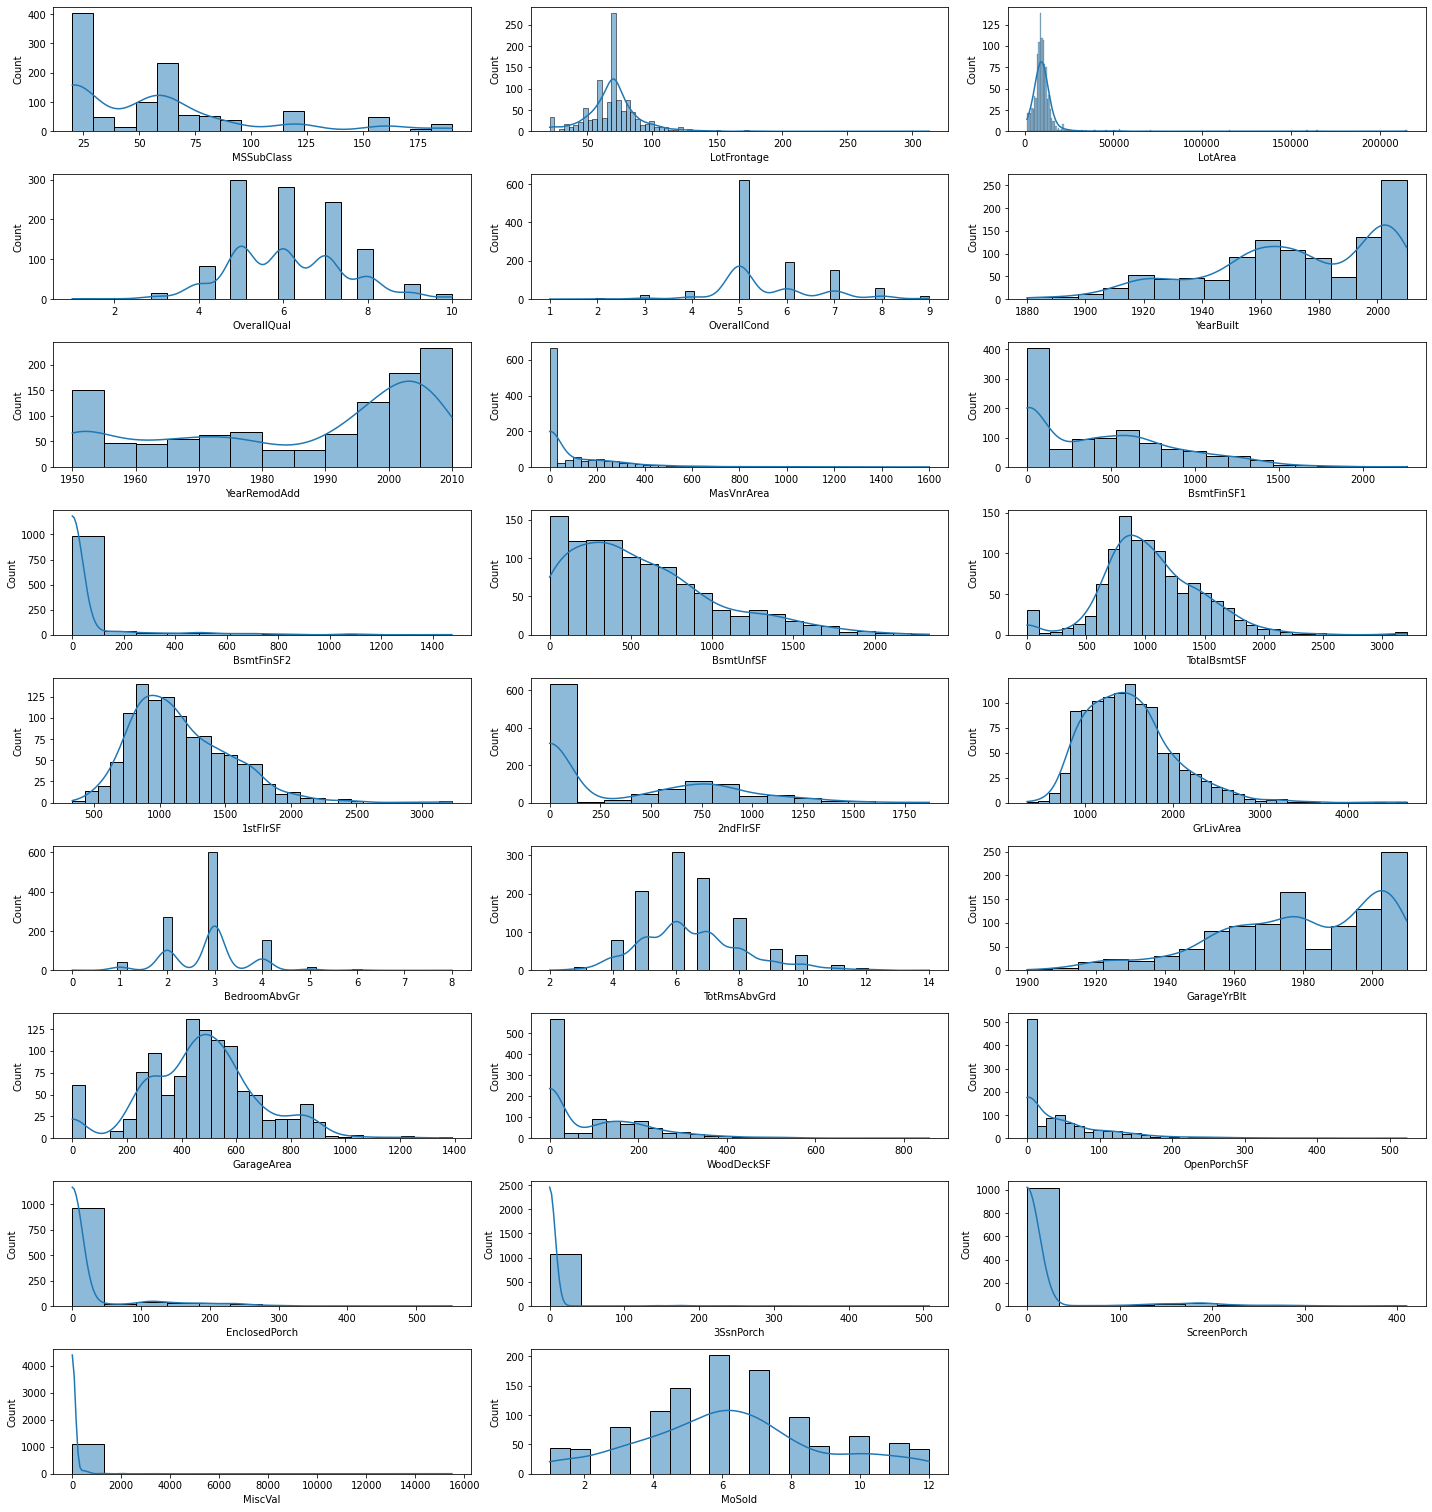

In [ ]:
# histplot to check distribution and skewness of numerical variables
plt.figure(figsize =(20,30))
for i,j in enumerate(num_new[:-1]):
  plt.subplot(13,3,i+1)
  sns.histplot(trainData, x = j, kde = True)
  plt.tight_layout()

In [ ]:
# removing skewness
for i in num_new[:-1]:
  if trainData[i].skew()<-1:
    trainData[i] = np.power(trainData[i],4)                 # left skewed
    testData[i] = np.power(testData[i],4)
  elif data[i].skew()>1:
    print(trainData[i])
    trainData[i] = np.cbrt(trainData[i])                   # right skewed
    testData[i] = np.cbrt(testData[i])

0        60
1        20
2        60
3        70
4        60
       ... 
1095     20
1096     70
1097    120
1098     50
1099     20
Name: MSSubClass, Length: 1100, dtype: int64
0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1095    78.0
1096    60.0
1097    70.0
1098    50.0
1099    82.0
Name: LotFrontage, Length: 1100, dtype: float64
0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1095     9317
1096     6882
1097     3696
1098     6000
1099    11880
Name: LotArea, Length: 1100, dtype: int64
0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1095      0.0
1096      0.0
1097      0.0
1098      0.0
1099    206.0
Name: MasVnrArea, Length: 1100, dtype: float64
0       706
1       978
2       486
3       216
4       655
       ... 
1095     24
1096      0
1097      0
1098    672
1099    704
Name: BsmtFinSF1, Length: 1100, dtype: int64
0       0
1       0
2       0
3       0
4       0
       .

In [ ]:
x = trainData[num_new[:-1]].skew()
x

MSSubClass       0.566356
LotFrontage     -0.371023
LotArea          2.563454
OverallQual      0.186732
OverallCond      0.616045
YearBuilt       -0.615550
YearRemodAdd    -0.532067
MasVnrArea       0.679778
BsmtFinSF1      -0.371728
BsmtFinSF2       2.680200
BsmtUnfSF        0.958026
TotalBsmtSF     -2.954709
1stFlrSF         0.301803
2ndFlrSF         0.808880
GrLivArea        0.306899
BedroomAbvGr     0.320720
TotRmsAbvGrd     0.679558
GarageYrBlt     -0.688382
GarageArea       0.088955
WoodDeckSF       0.218059
OpenPorchSF      0.202297
EnclosedPorch    2.205389
3SsnPorch        7.750186
ScreenPorch      3.211377
MiscVal          6.011262
MoSold           0.207737
dtype: float64

In [ ]:
x.iloc[1]

-0.37102278576434544

In [ ]:
list(x)

[0.5663555568177784,
 -0.37102278576434544,
 2.563453790795276,
 0.18673171522440635,
 0.6160454158954047,
 -0.6155503473771474,
 -0.5320674766995818,
 0.6797776040250982,
 -0.3717279609342367,
 2.6802003062933593,
 0.9580255222598641,
 -2.9547091237318956,
 0.30180313524052427,
 0.8088802831523526,
 0.3068987001579152,
 0.3207200199140531,
 0.6795576491208667,
 -0.6883820427395259,
 0.08895456932249242,
 0.21805942169111733,
 0.2022967498319096,
 2.2053891324398815,
 7.750186352886799,
 3.211376808220757,
 6.011261901226441,
 0.20773706440962464]

In [ ]:
# removing attributes with skewness less than -1 or greater than 1
num_new = list(num_new)
t = []
for i,j in enumerate(list(x)):
  if j<-1 or j>1:
    trainData = trainData.drop(num_new[i], axis = 1)
    testData = testData.drop(num_new[i], axis = 1)

In [ ]:
len(num_new)

27

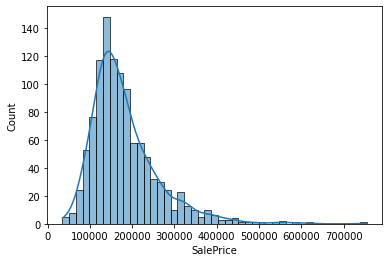

In [ ]:
sns.histplot(trainData, x = 'SalePrice', kde = True)  # here we see the data is highly right-skewed(positive). We need to correct it.

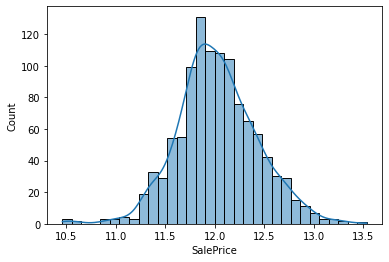

In [ ]:
trainData.SalePrice = np.log(trainData.SalePrice)                   # to correct positive skewness we use log transformation
sns.histplot(trainData, x = 'SalePrice', kde = True) 

In [ ]:
trainData.shape, testData.shape

((1100, 251), (360, 229))

In [ ]:
y = trainData.SalePrice
trainData = trainData.drop('SalePrice', axis=1)

In [ ]:
trainData.head()

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PoolArea_0,PoolArea_512,PoolArea_648,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3.914868,4.020726,7,5,2003,2003,5.808786,8.904337,150,9.494919,854,11.958188,3,8,2003.0,548,0.000000,3.936497,2,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2.714418,4.308869,6,8,1976,1976,0.000000,9.926122,284,10.806535,0,10.806535,3,6,1976.0,460,6.679420,0.000000,5,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3.914868,4.081655,7,5,2001,2002,5.451362,7.862224,434,9.725888,866,12.132785,3,6,2001.0,608,0.000000,3.476027,9,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4.121285,3.914868,7,5,1915,1970,0.000000,6.000000,540,9.868272,756,11.974483,3,7,1998.0,642,0.000000,3.271066,2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,3.914868,4.379519,8,5,2000,2000,7.047299,8.684546,490,10.461690,1053,13.001972,4,9,2000.0,836,5.768998,4.379519,12,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


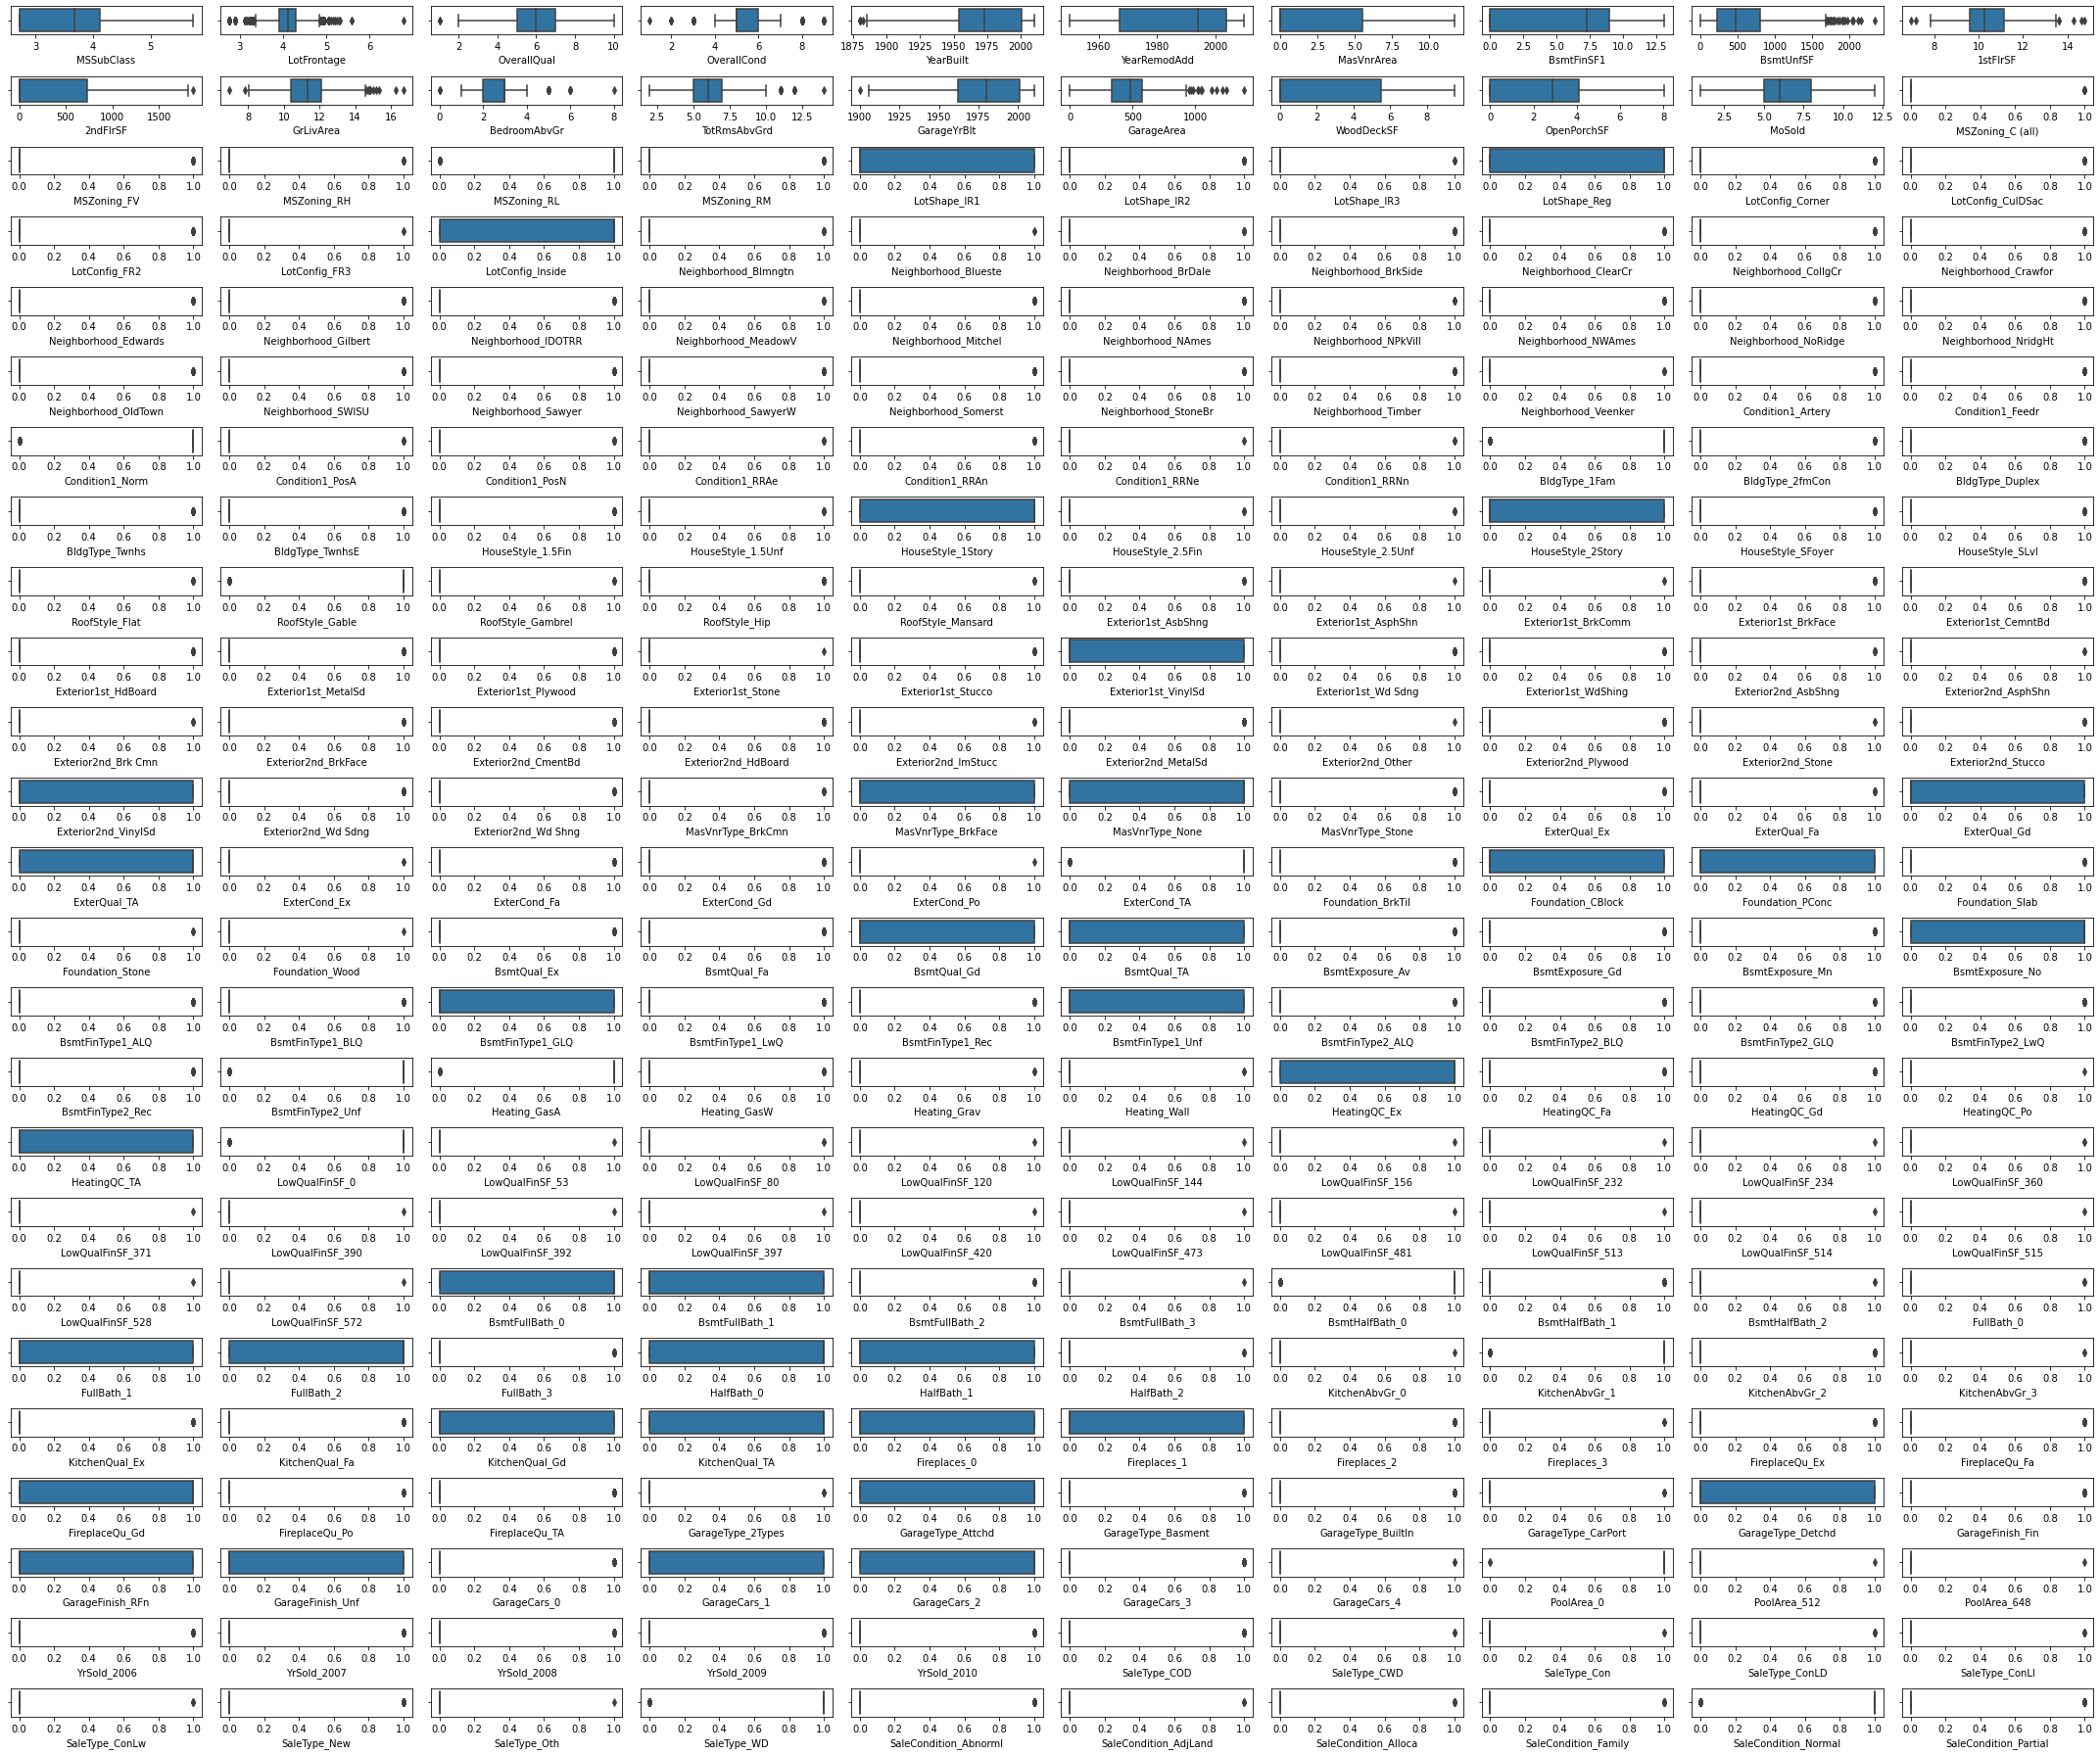

In [ ]:
# outlier analysis
# plt.figure(figsize=(30,25))
# for i in range(len(trainData.columns)):
#   plt.subplot(25,10,i+1)
#   sns.boxplot(x = trainData[trainData.columns[i]] )
# plt.tight_layout()

In [ ]:
# Removing outlier
for i in trainData.columns:
  up = trainData[i].quantile(0.95)
  down = trainData[i].quantile(0.15)
  med = trainData[i].quantile(0.50)
  trainData[i] = np.where(trainData[i] >up, med,trainData[i])
  trainData[i] = np.where(trainData[i] <down, med,trainData[i])

In [ ]:
trainData.head()

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,PoolArea_0,PoolArea_512,PoolArea_648,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3.914868,4.020726,7.0,5.0,2003.0,2003.0,5.808786,8.904337,150.0,9.494919,854.0,11.958188,3.0,8.0,2003.0,548.0,0.000000,3.936497,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.684031,4.308869,6.0,8.0,1976.0,1976.0,0.000000,9.926122,284.0,10.806535,0.0,10.806535,3.0,6.0,1976.0,460.0,6.679420,0.000000,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.914868,4.081655,7.0,5.0,2001.0,2002.0,5.451362,7.862224,434.0,9.725888,866.0,12.132785,3.0,6.0,2001.0,608.0,0.000000,3.476027,9.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.121285,3.914868,7.0,5.0,1973.0,1970.0,0.000000,6.000000,540.0,9.868272,756.0,11.974483,3.0,7.0,1998.0,642.0,0.000000,3.271066,6.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3.914868,4.379519,8.0,5.0,2000.0,2000.0,7.047299,8.684546,490.0,10.461690,1053.0,13.001972,4.0,9.0,2000.0,836.0,5.768998,4.379519,6.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


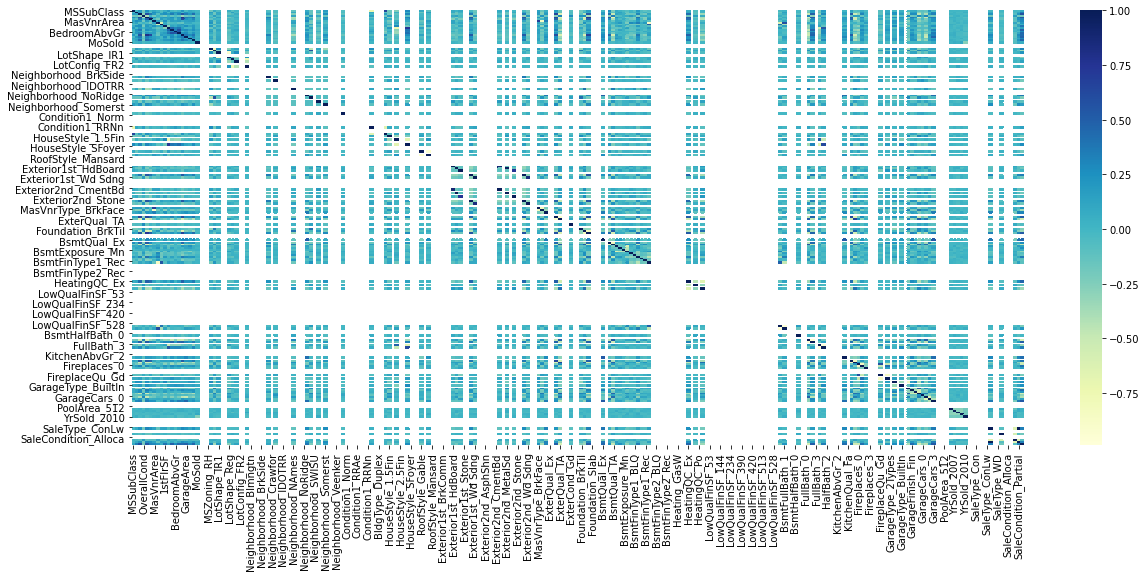

In [ ]:
# feature selection
trainData['SalePrice'] = y
corr = trainData.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, cmap='YlGnBu')

In [ ]:
# finding the correlation btw features with target
trainData.corr().SalePrice.value_counts()

-0.365052    1
 0.471103    1
 0.065822    1
 0.188322    1
-0.071638    1
            ..
 0.128038    1
-0.591205    1
 0.173168    1
-0.085544    1
 1.000000    1
Name: SalePrice, Length: 111, dtype: int64

In [ ]:
x = pd.DataFrame(trainData.corr().SalePrice)

In [ ]:
# selecting features 
new_variables = []
for i in x.index:
  if x.loc[i].SalePrice>0.1:
    new_variables.append(i)
new_variables

['LotFrontage',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MSZoning_RL',
 'LotShape_IR1',
 'LotConfig_CulDSac',
 'Neighborhood_CollgCr',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'BldgType_1Fam',
 'HouseStyle_2Story',
 'RoofStyle_Hip',
 'Exterior1st_VinylSd',
 'Exterior2nd_VinylSd',
 'MasVnrType_BrkFace',
 'MasVnrType_Stone',
 'ExterQual_Gd',
 'Foundation_PConc',
 'BsmtQual_Ex',
 'BsmtQual_Gd',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtFinType1_GLQ',
 'HeatingQC_Ex',
 'BsmtFullBath_1',
 'FullBath_2',
 'HalfBath_1',
 'KitchenQual_Ex',
 'KitchenQual_Gd',
 'Fireplaces_1',
 'Fireplaces_2',
 'FireplaceQu_TA',
 'GarageType_Attchd',
 'GarageType_BuiltIn',
 'GarageFinish_Fin',
 'GarageFinish_RFn',
 'GarageCars_2',
 'GarageCars_3',
 'SaleType_New',
 'SaleCondition_Partial',
 'SalePrice']

In [ ]:
len(testData.columns), len(trainData.columns)

(229, 251)

In [ ]:
trainData = trainData[new_variables]
testData = testData[new_variables]
trainData.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MSZoning_RL,LotShape_IR1,LotConfig_CulDSac,Neighborhood_CollgCr,Neighborhood_NridgHt,Neighborhood_Somerst,BldgType_1Fam,HouseStyle_2Story,RoofStyle_Hip,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Gd,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtExposure_Av,BsmtExposure_Gd,BsmtFinType1_GLQ,HeatingQC_Ex,BsmtFullBath_1,FullBath_2,HalfBath_1,KitchenQual_Ex,KitchenQual_Gd,Fireplaces_1,Fireplaces_2,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageFinish_Fin,GarageFinish_RFn,GarageCars_2,GarageCars_3,SaleType_New,SaleCondition_Partial,SalePrice
0,4.020726,7.0,2003.0,2003.0,5.808786,8.904337,9.494919,854.0,11.958188,3.0,8.0,2003.0,548.0,0.000000,3.936497,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.247694
1,4.308869,6.0,1976.0,1976.0,0.000000,9.926122,10.806535,0.0,10.806535,3.0,6.0,1976.0,460.0,6.679420,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.109011
2,4.081655,7.0,2001.0,2002.0,5.451362,7.862224,9.725888,866.0,12.132785,3.0,6.0,2001.0,608.0,0.000000,3.476027,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.317167
3,3.914868,7.0,1973.0,1970.0,0.000000,6.000000,9.868272,756.0,11.974483,3.0,7.0,1998.0,642.0,0.000000,3.271066,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.849398
4,4.379519,8.0,2000.0,2000.0,7.047299,8.684546,10.461690,1053.0,13.001972,4.0,9.0,2000.0,836.0,5.768998,4.379519,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,12.429216


In [ ]:
len(testData.columns), len(trainData.columns)

(53, 53)

In [ ]:
trainData = trainData.reset_index()
trainData.head()


,index,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MSZoning_RL,LotShape_IR1,LotConfig_CulDSac,Neighborhood_CollgCr,Neighborhood_NridgHt,Neighborhood_Somerst,BldgType_1Fam,HouseStyle_2Story,RoofStyle_Hip,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Gd,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtExposure_Av,BsmtExposure_Gd,BsmtFinType1_GLQ,HeatingQC_Ex,BsmtFullBath_1,FullBath_2,HalfBath_1,KitchenQual_Ex,KitchenQual_Gd,Fireplaces_1,Fireplaces_2,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageFinish_Fin,GarageFinish_RFn,GarageCars_2,GarageCars_3,SaleType_New,SaleCondition_Partial,SalePrice
0,0,4.020726,7.0,2003.0,2003.0,5.808786,8.904337,9.494919,854.0,11.958188,3.0,8.0,2003.0,548.0,0.000000,3.936497,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.247694
1,1,4.308869,6.0,1976.0,1976.0,0.000000,9.926122,10.806535,0.0,10.806535,3.0,6.0,1976.0,460.0,6.679420,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.109011
2,2,4.081655,7.0,2001.0,2002.0,5.451362,7.862224,9.725888,866.0,12.132785,3.0,6.0,2001.0,608.0,0.000000,3.476027,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.317167
3,3,3.914868,7.0,1973.0,1970.0,0.000000,6.000000,9.868272,756.0,11.974483,3.0,7.0,1998.0,642.0,0.000000,3.271066,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.849398
4,4,4.379519,8.0,2000.0,2000.0,7.047299,8.684546,10.461690,1053.0,13.001972,4.0,9.0,2000.0,836.0,5.768998,4.379519,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,12.429216


In [ ]:
trainData = trainData.drop('index', axis=1)
trainData.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MSZoning_RL,LotShape_IR1,LotConfig_CulDSac,Neighborhood_CollgCr,Neighborhood_NridgHt,Neighborhood_Somerst,BldgType_1Fam,HouseStyle_2Story,RoofStyle_Hip,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Gd,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtExposure_Av,BsmtExposure_Gd,BsmtFinType1_GLQ,HeatingQC_Ex,BsmtFullBath_1,FullBath_2,HalfBath_1,KitchenQual_Ex,KitchenQual_Gd,Fireplaces_1,Fireplaces_2,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageFinish_Fin,GarageFinish_RFn,GarageCars_2,GarageCars_3,SaleType_New,SaleCondition_Partial,SalePrice
0,4.020726,7.0,2003.0,2003.0,5.808786,8.904337,9.494919,854.0,11.958188,3.0,8.0,2003.0,548.0,0.000000,3.936497,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.247694
1,4.308869,6.0,1976.0,1976.0,0.000000,9.926122,10.806535,0.0,10.806535,3.0,6.0,1976.0,460.0,6.679420,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.109011
2,4.081655,7.0,2001.0,2002.0,5.451362,7.862224,9.725888,866.0,12.132785,3.0,6.0,2001.0,608.0,0.000000,3.476027,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.317167
3,3.914868,7.0,1973.0,1970.0,0.000000,6.000000,9.868272,756.0,11.974483,3.0,7.0,1998.0,642.0,0.000000,3.271066,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.849398
4,4.379519,8.0,2000.0,2000.0,7.047299,8.684546,10.461690,1053.0,13.001972,4.0,9.0,2000.0,836.0,5.768998,4.379519,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,12.429216


In [ ]:
testData.head()

,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,MSZoning_RL,LotShape_IR1,LotConfig_CulDSac,Neighborhood_CollgCr,Neighborhood_NridgHt,Neighborhood_Somerst,BldgType_1Fam,HouseStyle_2Story,RoofStyle_Hip,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrType_BrkFace,MasVnrType_Stone,ExterQual_Gd,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtExposure_Av,BsmtExposure_Gd,BsmtFinType1_GLQ,HeatingQC_Ex,BsmtFullBath_1,FullBath_2,HalfBath_1,KitchenQual_Ex,KitchenQual_Gd,Fireplaces_1,Fireplaces_2,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageFinish_Fin,GarageFinish_RFn,GarageCars_2,GarageCars_3,SaleType_New,SaleCondition_Partial,SalePrice
1100,3.914868,2,1920,1950,0.000000,6.619106,7.594363,0,7.594363,1,3,1930.0,246,0.0,0.000000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60000
1101,3.936497,5,1971,1971,0.000000,7.441019,9.830476,0,9.830476,3,5,1981.0,280,0.0,0.000000,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,119500
1102,4.121285,5,1960,2002,3.556893,8.377719,10.428080,0,10.428080,2,6,1960.0,254,0.0,2.519842,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,135000
1103,4.290840,6,1959,1959,0.000000,8.684546,10.608845,0,10.608845,3,6,1954.0,539,0.0,0.000000,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,159500
1104,2.884499,5,1970,1970,6.723951,0.000000,8.572619,672,10.919523,3,6,1970.0,440,0.0,0.000000,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,106000


In [ ]:
# splitting data for model building
Xtrain = trainData.iloc[:,:-1]
ytrain = trainData.iloc[:,-1]
Xtest = testData.iloc[:,:-1]
ytest = testData.iloc[:,-1]
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((1100, 52), (360, 52), (1100,), (360,))

In [ ]:
# implementing Linear Regression model
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(Xtrain, ytrain)
lr.score(Xtrain, ytrain)

0.8096276456826832

In [ ]:
# testing the model
from sklearn.metrics import r2_score, mean_squared_error
pred = lr.predict(Xtest)
r2_score(ytest, np.exp(pred)), np.sqrt(mean_squared_error(ytest, np.exp(pred)))

(0.5209216948034163, 54678.976209559136)

In [ ]:
x = lr.predict(Xtest.iloc[:10,:])
xN = np.exp(x)
for i,y in zip(xN, ytest[:10]):
  print('Actual:', y)
  print('Predicted:', i)
  print()

Actual: 60000
Predicted: 66785.15001986845

Actual: 119500
Predicted: 101494.04672048757

Actual: 135000
Predicted: 124902.0622636393

Actual: 159500
Predicted: 166843.34862937167

Actual: 106000
Predicted: 85236.16829385707

Actual: 325000
Predicted: 348860.90786114504

Actual: 179900
Predicted: 236980.2698363803

Actual: 274725
Predicted: 301225.9469847787

Actual: 181000
Predicted: 169364.102996826

Actual: 280000
Predicted: 378568.04471196374



In [ ]:
#Building a model on XGBoost
from xgboost import XGBRegressor
my_XGB_model = XGBRegressor()
my_XGB_model.fit(Xtrain, ytrain, verbose=False)
my_XGB_model.score(Xtrain, ytrain)

[20:44:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8920303832385581

In [ ]:
# predicting on XGBoost
pred = my_XGB_model.predict(Xtest)
r2_score(ytest, np.exp(pred)), np.sqrt(mean_squared_error(ytest, np.exp(pred)))

(0.8143933887597923, 34034.06648582002)

In [ ]:
x = my_XGB_model.predict(Xtest.iloc[:10,:])
xN = np.exp(x)
for i,y in zip(xN, ytest[:10]):
  print('Actual:', y)
  print('Predicted:', i)
  print()

Actual: 60000
Predicted: 106980.26

Actual: 119500
Predicted: 120846.7

Actual: 135000
Predicted: 137803.47

Actual: 159500
Predicted: 154752.89

Actual: 106000
Predicted: 103197.13

Actual: 325000
Predicted: 281556.12

Actual: 179900
Predicted: 221821.75

Actual: 274725
Predicted: 248880.56

Actual: 181000
Predicted: 178187.12

Actual: 280000
Predicted: 313822.5

